# Analyzing results of one experiment trained with seed 97 and different sample seeds for testing.
### Finding std of std and mean
### plotting the predictions
### plotting kde
### KS test

## imports

In [2]:
# Third-party imports
%matplotlib inline
import json
import matplotlib.pyplot as plt


In [1]:
from scr.RQ1_forecast import *

In [3]:
num_samples = 100

In [40]:
data_address1 = '/home/dev/deepts/experiments/deep_ar/electricity/5A/repetition97/samples'
os.path.isdir(data_address1)

True

# Forecast section

## Load data

In [41]:
import re
# does the natural sorting of the files
def read_csv_result_seed(result_type, address, n_files=None):
    rootdir = address
    os.path.isdir(rootdir)

    df_list = []
    filenames = []

    for subdir, _, files in tqdm(os.walk(rootdir)):
        # print(subdir)
        filenames += [os.path.join(subdir, file) for file in files if result_type in file]
    filenames.sort(key=lambda var:[int(x) if x.isdigit() else x for x in re.findall(r'[^0-9]|[0-9]+', var)])

    if n_files is not None:
        filenames = filenames[:n_files]
        
    for filename in tqdm(filenames, ascii=True, ncols=50):
        df = pd.read_csv(filename)
        df_list.append(df)
        
    return df_list

In [42]:
# read the forcast file
forcast_list1 = read_csv_result_seed('forecasts.csv', data_address1)

1it [00:00, 1081.84it/s]
100%|###########| 100/100 [06:52<00:00,  4.12s/it]


In [43]:
len(forcast_list1)

100

In [44]:
# sort the forcast lists based on their original time series
sorted_forcast_list1 = get_sorted_csv(forcast_list1)

In [45]:
sorted_forcast_list1[0]

,fold_num,series_number,timestamp,target,sample0,sample1,sample2,sample3,sample4,sample5,...,sample94,sample95,sample96,sample97,sample98,sample99,train_series_number,mean,std,normal_std
0,1,0,2014-05-26 20:00:00,9.0,3.301186,-0.492619,3.088363,-0.152779,3.935278,2.440658,...,0.685889,3.557988,0.126440,-1.865669,-0.748157,7.374016,0,2.033100,9.965927,0.094428
1,1,0,2014-05-26 21:00:00,10.0,0.684535,2.623073,5.525078,2.263438,0.712730,0.792863,...,2.839659,3.950199,3.047277,-0.497339,4.694101,1.442854,0,2.754403,2.619226,0.160691
2,1,0,2014-05-26 22:00:00,22.0,3.516086,-1.845669,2.731877,4.956955,6.804797,-0.031494,...,0.430013,6.825864,1.859944,6.616785,0.531693,4.760762,0,1.556762,3.376712,0.161834
3,1,0,2014-05-26 23:00:00,20.0,5.167650,7.331059,-6.305578,-9.700918,2.101543,0.913601,...,-7.243182,5.295449,3.134413,22.861927,4.961160,-2.460240,0,2.219752,4.261224,0.130206
4,1,0,2014-05-27 00:00:00,13.0,6.868669,-2.375212,4.140243,5.109089,7.454979,6.023809,...,0.700146,8.723991,4.851695,3.888244,8.862911,2.301220,0,4.889610,4.770222,0.103239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53923,1,2246,2014-06-02 15:00:00,4209.0,3045.269800,2577.337000,2836.651400,2365.159000,2552.942400,2445.605700,...,2209.716300,2662.507600,2835.197800,2983.135300,2468.559300,2792.894300,320,2758.584637,301.604010,0.168100
53924,1,2246,2014-06-02 16:00:00,4120.0,3034.624500,2900.160000,2907.209200,2237.581800,1980.885300,2830.109000,...,2587.104200,2542.455800,2422.236600,2860.110000,2379.626200,2937.815000,320,2815.429353,277.668952,0.168505
53925,1,2246,2014-06-02 17:00:00,3951.0,3209.221400,3165.940700,3194.991200,2915.451200,2629.191000,2743.582500,...,2705.268800,2724.128200,2727.569000,2969.231700,3012.093000,2131.317900,320,2863.363936,416.634525,0.136605
53926,1,2246,2014-06-02 18:00:00,3907.0,2757.859900,2762.061300,2655.258000,2755.210700,2579.086200,2803.834500,...,2824.801800,2591.829300,2868.415800,2987.601800,3074.078600,2201.481200,320,2736.773783,274.981239,0.154954


## get each time series individually

In [46]:
target_forcast_series = get_forcast_target(forcast_list1)

In [47]:
# this dataframe is just one time series
ts_number = 0
ts_list1 = get_ts_list(sorted_forcast_list1, ts_number)

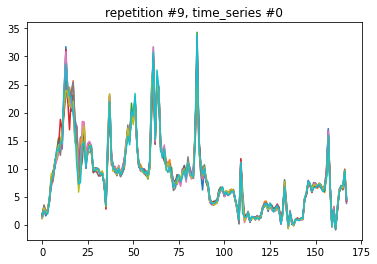

In [49]:
# plot mean of only one time series
rep_no = 2
for rep_no in range(10):
    plt.title(f'repetition #{rep_no}, time_series #{ts_number}')
    ts_list1[rep_no]['mean'].plot()

## plot the kde for experiments

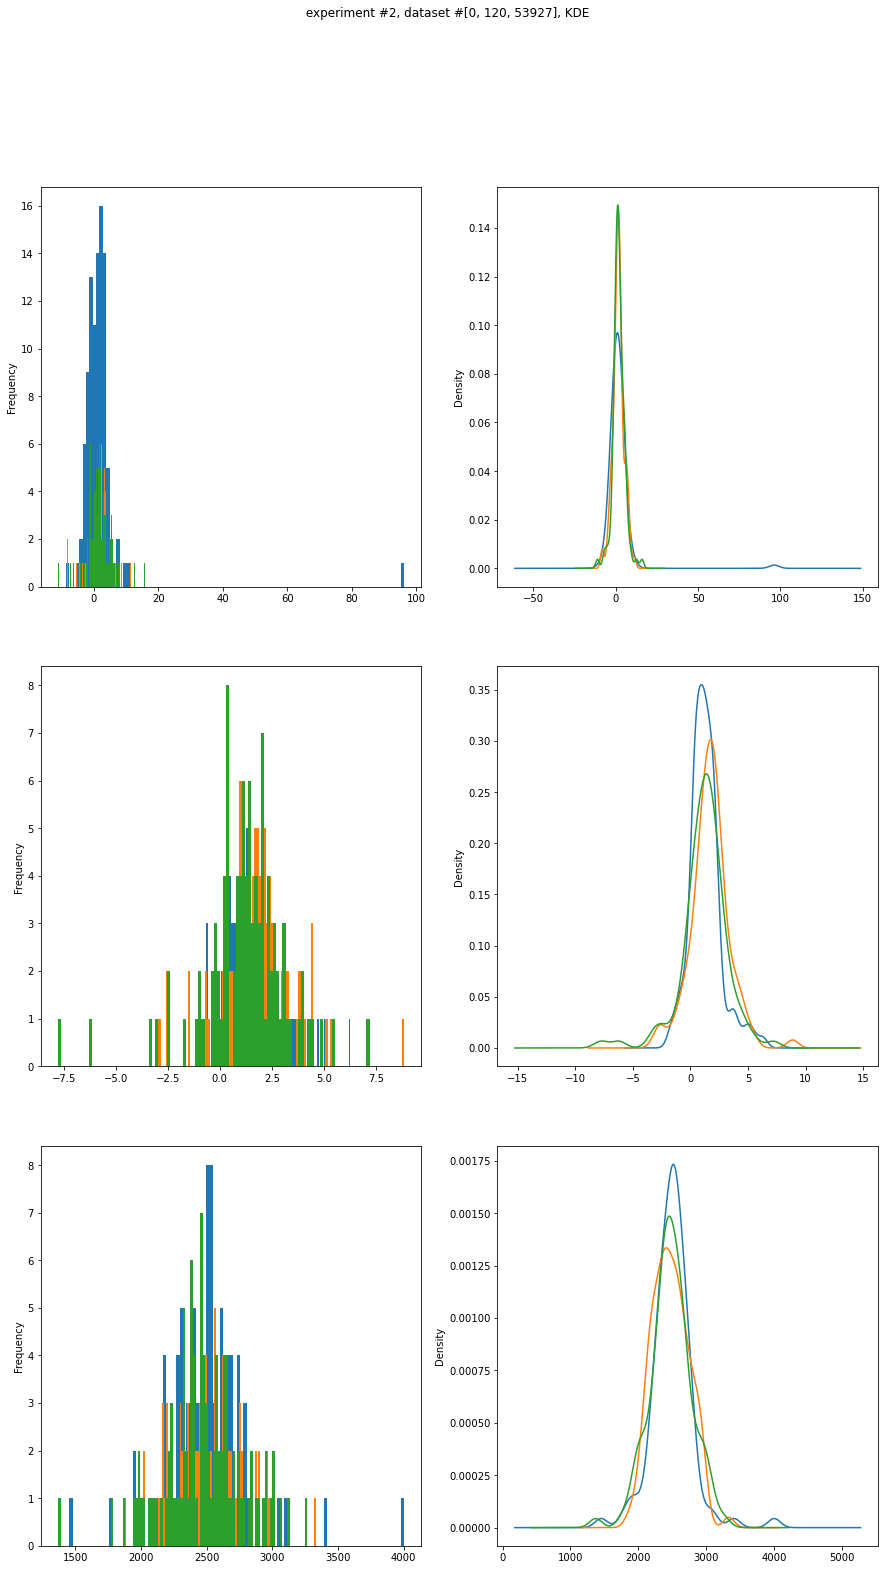

In [50]:
data_n = [0, 120, 53927]
max_shape = 3 # number of experiments that are going to be plotted
plot_kde_hist(data_n, max_shape, sorted_forcast_list1)

## std of mean and std over time

In [51]:
## calculate the std over different repetitions
forecast_distrib_df1 = get_forcast_distrib(forcast_list1)
# convert the list of dataframes to a 3d np
forecast_np = get_np_forcast(forecast_distrib_df1)
# get std over different experiments
forecast_std_np = get_std_np(forecast_np, forecast_distrib_df1)
df_std_forecast = pd.DataFrame(forecast_std_np)
df_std_forecast.rename(index={0:'mean',1:'sigma'}, inplace=True)

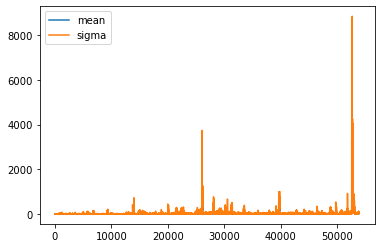

In [52]:
df_std_forecast.T.plot()

## plot samples of experimets

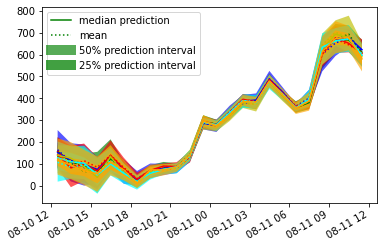

In [53]:
sample_forcast_list1 = get_forcast_samples(forcast_list1)
tmp_n = 53736
plot_forscast_same(sample_forcast_list1, tmp_n, lim=5)

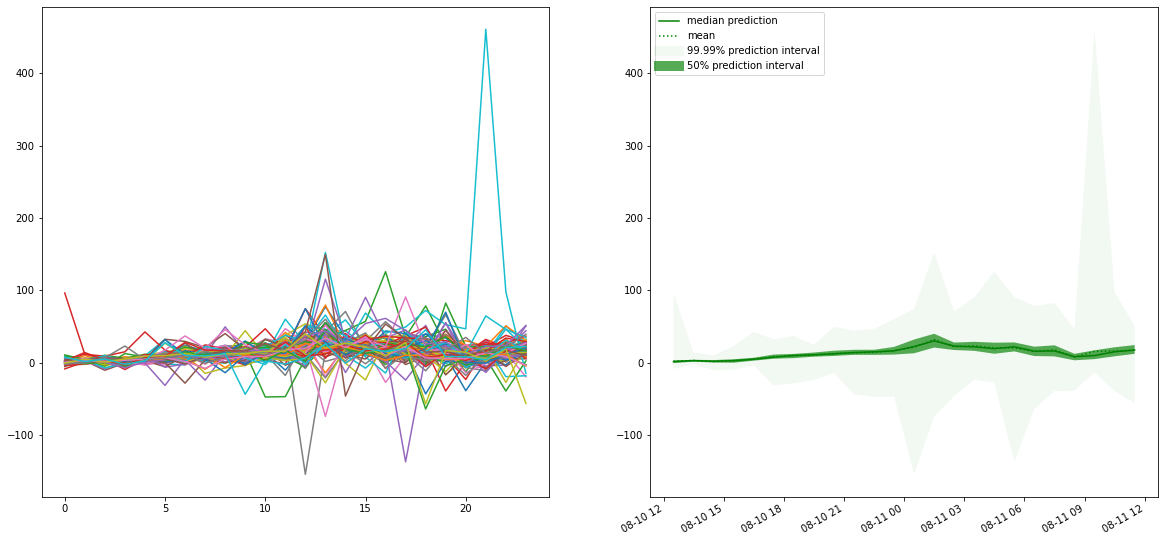

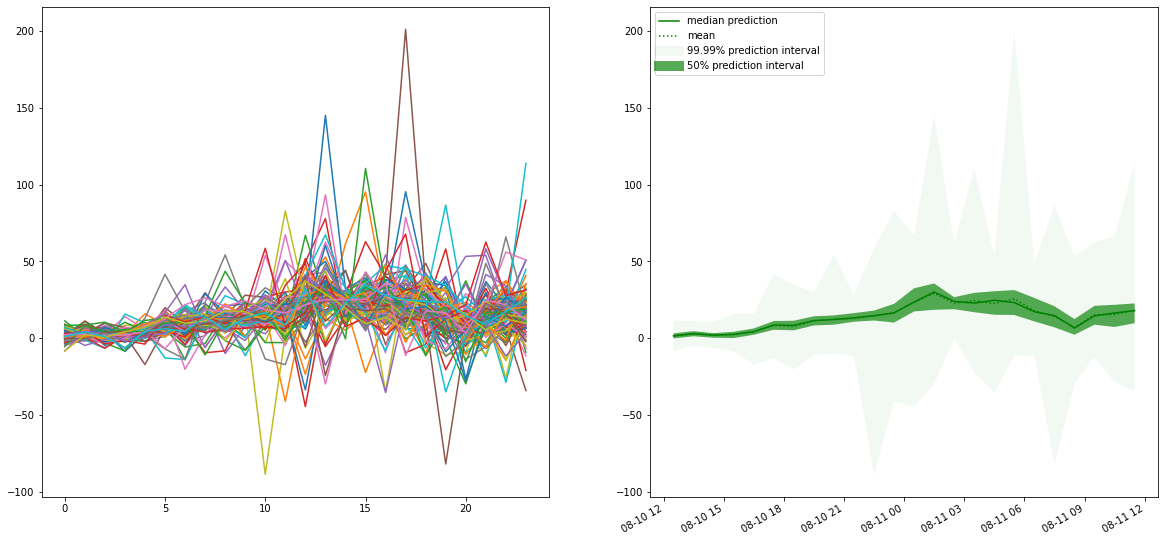

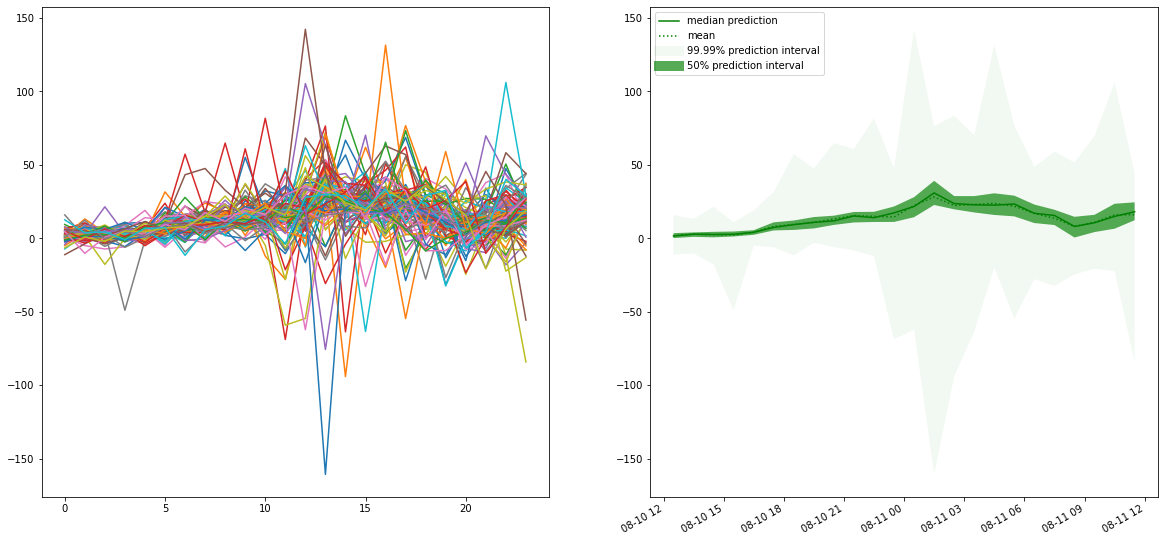

In [55]:
time_point_no = 0
rep_lim = 3
save_plot_exp(sample_forcast_list1, rep_lim, time_point_no)

## KS Test

In [60]:
# we set the datapoint to 4
data_n_el = 4

# make some samples to visualize
exp_n = 0
sample0 = sample_forcast_list1[exp_n][data_n_el]

exp_n = 90
sample90 = sample_forcast_list1[exp_n][data_n_el]

exp_n = 91
sample91 = sample_forcast_list1[exp_n][data_n_el]

(-15.0, 15.0)

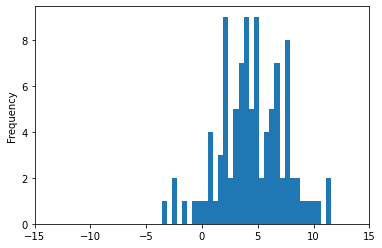

In [61]:
# plot the samples
sample0.plot.hist(bins = 100)
plt.xlim([-15,15])

(-15.0, 15.0)

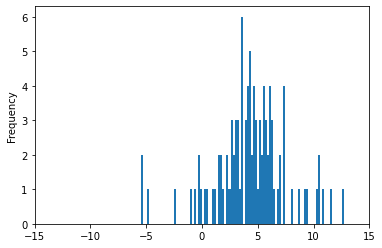

In [62]:
sample90.plot.hist(bins = 100)
plt.xlim([-15,15])

(-15.0, 15.0)

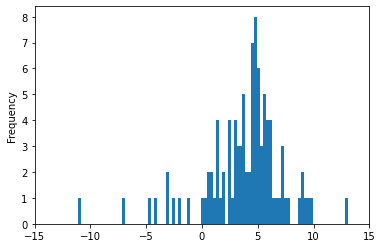

In [63]:
sample91.plot.hist(bins = 100)
plt.xlim([-15,15])

In [64]:
# calculate the table of ks tests for each time points
data_point = 1000
ks_table = get_ks_tmp(sample_forcast_list1, data_point)

In [65]:
ks_table

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,False,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,False,False,False,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,False,False,False,False,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,True
96,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
97,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
98,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True


In [66]:
# calculate the proportion of true/all for upper triangle of the table
portion_ks_table(ks_table)

0.9775757575757575

As it is apparant for tmp=12 the ks test gave us good results. however, for tmp=1000 it is not the case

In [67]:
# now we can loop through all 53000 time points and output the results
# try it for first 1000 points
tmp_lim = 1000

portion_array = np.zeros(tmp_lim)

for data_point in range(1000):
    ks_table = get_ks_tmp(sample_forcast_list1, data_point)  
    portion_array[data_point]= portion_ks_table(ks_table)
    # print(data_point)

Text(0.5, 1.0, 'first day of time series #3')

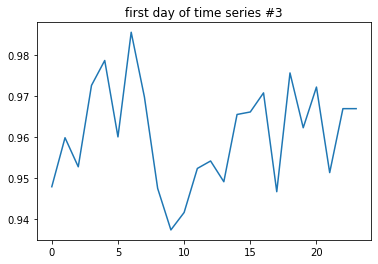

In [68]:
i = 3
plt.plot(portion_array[i*168: (i)*168 + 24])
plt.title(f'first day of time series #{i}')

Text(0.5, 1.0, 'time series #2')

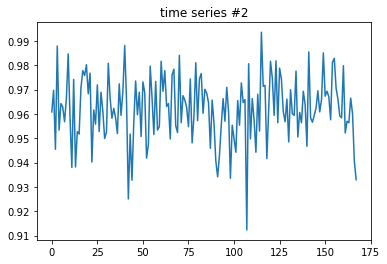

In [69]:
i = 2
plt.plot(portion_array[i*168 : (i+1)*168])
plt.title(f'time series #{i}')

Text(0.5, 1.0, 'all time series')

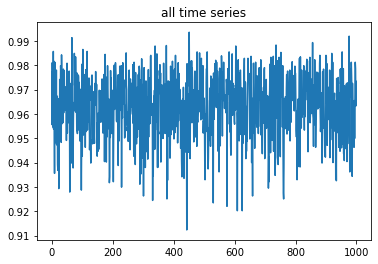

In [70]:
plt.plot(portion_array)
plt.title('all time series')